# Homework 2

## Complex numbers

In [813]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [814]:
3 + 2j

(3+2j)

In [815]:
a = 3
b = 3
z = a + b* 1j
print ('z = ', z)
print ('The type of the variable is ', type(z))

z =  (3+3j)
The type of the variable is  <class 'complex'>


In [816]:
(2.75 + 3.69j) * (8.55 - 6.13j)

(46.1322+14.692000000000004j)

In [817]:
1.4 * np.exp(5.32j)

(0.79927078585823497-1.1494199453957457j)

In [818]:
(7.51 - 9.15j) / (4.43 + 9.64j) 

(-0.4880897698448308-1.0033441577191493j)

# Shapes created by the Joukowski transformation

In [819]:
def jouk(z,c):
    xi = z + (c**2)/z
    return xi

(1.4998111915108125, -1.4998111915108125)

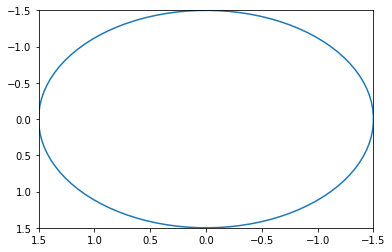

In [820]:
c = 1
r = 1.5
theta  = np.linspace(0, 2 * math.pi,100)
z = r * np.cos(theta) + r * np.sin(theta)* 1j
plt.plot(z.real,z.imag)
plt.xlim(np.max(z.real),np.min(z.real))
plt.ylim(np.max(z.imag),np.min(z.imag))

(0.83322843972822924, -0.83322843972822913)

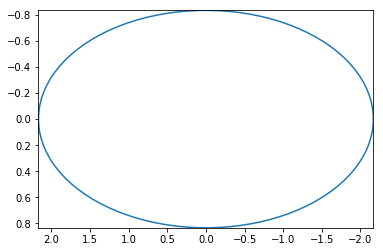

In [821]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.imag),np.min(j.imag))

In [822]:
r = 1.2
z = r * np.cos(theta) - (c-r) + r * np.sin(theta)* 1j

(1.19984895320865, -1.19984895320865)

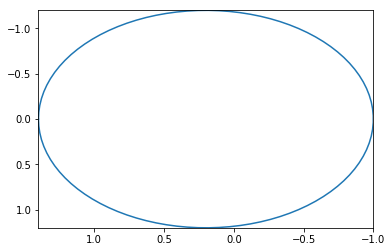

In [823]:
plt.plot(z.real,z.imag)
plt.xlim(np.max(z.real),np.min(z.real))
plt.ylim(np.max(z.imag),np.min(z.imag))

(2.1142857142857143, -1.9985502464120533)

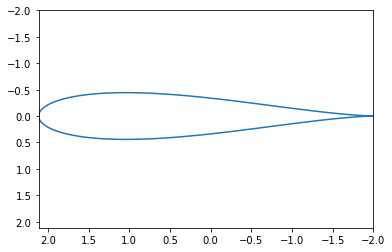

In [824]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.real),np.min(j.real))

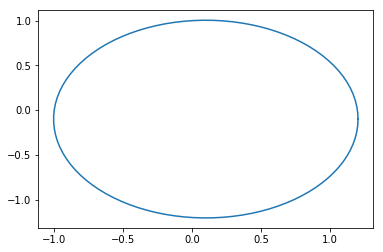

In [825]:
deltax , deltay = -0.1,0.1
r = ((c-deltax)**2+deltay**2)**.5
z = r*np.cos(theta)-(deltax) + (r*np.sin(theta) - deltay)*1j
plt.plot(z.real,z.imag)

(2.2352024386042277,
 -2.2016503822728848,
 0.15822439140505906,
 -0.42097085088168751)

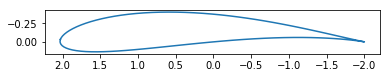

In [826]:
j = jouk(z,c)
plt.plot(j.real,j.imag)
plt.xlim(np.max(j.real),np.min(j.real))
plt.ylim(np.max(j.imag),np.min(j.imag))
plt.axis('scaled')

## Polar Coordinates

In [827]:
c = 1.0
r = 1.15
deltax , deltay = -0.15, 0.0
z = r*np.cos(theta)-(deltax) + (r*np.sin(theta) - deltay)*1j

In [828]:
Nr = 100
Nt = 145
grid_r = np.linspace(r,5,Nr)
grid_theta = np.linspace(0,2*math.pi,Nt)
r_mesh,theta_mesh = np.meshgrid(grid_r,grid_theta)
x_grid = r_mesh*np.cos(theta_mesh) - (r-c)
y_grid = r_mesh*np.sin(theta_mesh)
z_grid = x_grid + y_grid*1j

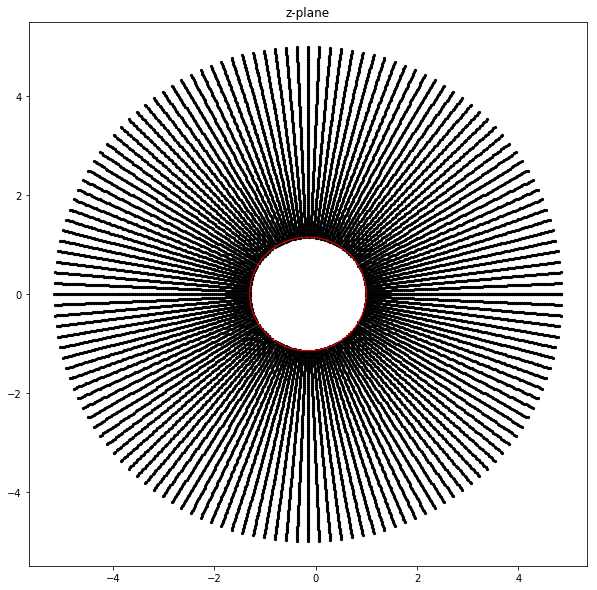

In [829]:
plt.figure(figsize=(10,10))
plt.scatter(z_grid.real,z_grid.imag,color='k', s=5)
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)
plt.title('z-plane')

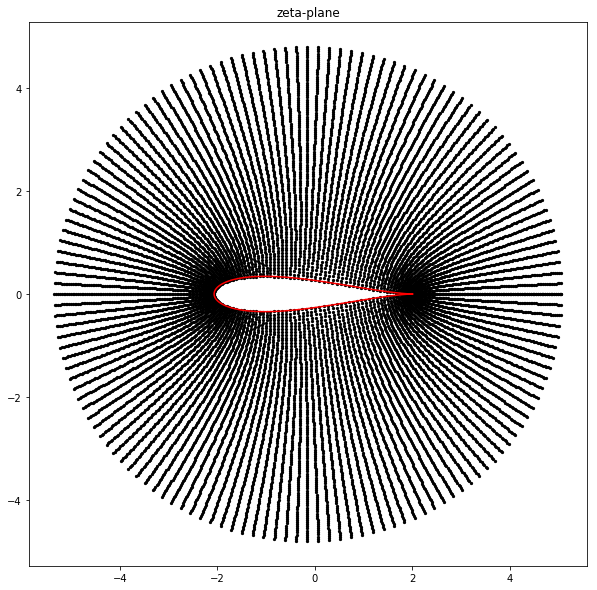

In [830]:
j_grid = jouk(z_grid,c)
z_circle = r*np.cos(theta)-(r-c) + r*np.sin(theta)*1j
plt.figure(figsize=(10,10))
plt.scatter(j_grid.real,j_grid.imag,color='k', s=5)
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('zeta-plane')

## Flow over a symmetric Joukowski airfoil

In [831]:

u_inf = 1.0
u_freestream = u_inf*np.ones(np.shape(j_grid.real))
v_freestream = np.zeros(np.shape(j_grid.imag))
psi_freestream = u_inf*y_grid

In [832]:
def vel_doub(sigma, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.
    
    Parameters
    ----------
    sigma: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = ( - sigma / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = ( - sigma / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    
    return u, v

def stream_doub(sigma, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.
    
    Parameters
    ----------
    sigma: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - sigma / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    
    return psi

In [833]:
x_doub = deltax
y_doub = deltay
sigma = (r**2)*2*math.pi*u_inf
print('Strength = ', sigma)

Strength =  8.309512568745001


In [834]:
u_doub, v_doub = vel_doub(sigma,x_doub,y_doub,x_grid,y_grid)
psi_doub = stream_doub(sigma,x_doub,y_doub,x_grid,y_grid)

u = u_doub + u_freestream
v = v_doub + v_freestream
psi = psi_doub + psi_freestream

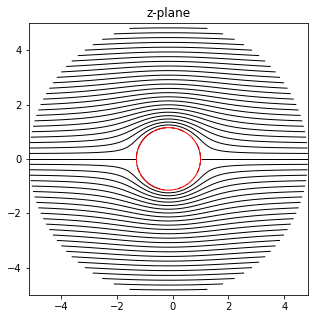

In [835]:
plt.figure(figsize=(5,5))
plt.contour(x_grid,y_grid,psi,levels=np.linspace(np.min(psi),np.max(psi),51), colors='k', linewidths=1, 
            linestyles='solid')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)
plt.title('z-plane')

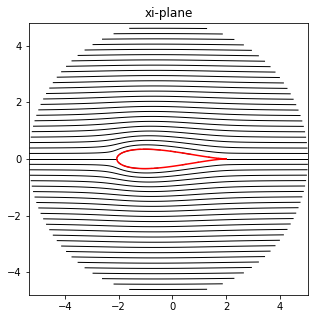

In [836]:
plt.figure(figsize=(5,5))
plt.contour(j_grid.real,j_grid.imag,psi,levels=np.linspace(np.min(psi),np.max(psi),51), colors='k', linewidths=1, 
            linestyles='solid')
z_circle = r*np.cos(theta)-(r-c) + r*np.sin(theta)*1j
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

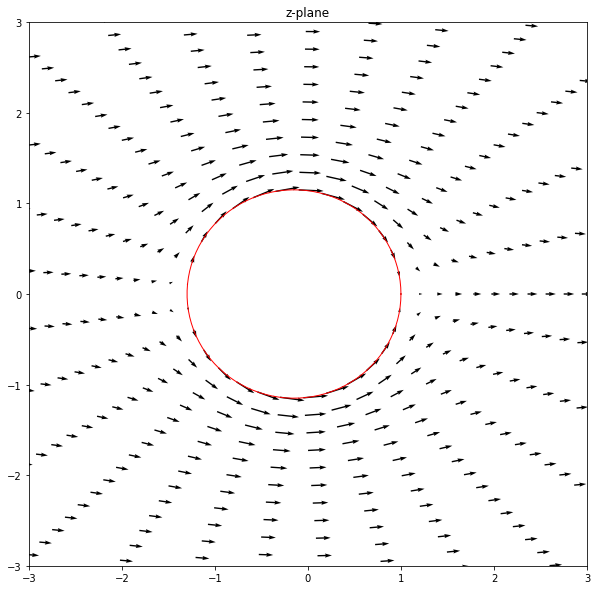

In [837]:
plt.figure(figsize=(10,10))
plt.quiver(x_grid[::5,::5],y_grid[::5,::5],u[::5,::5],v[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)
plt.title('z-plane')

In [838]:
vel_xi = (u - v*1j)/(1-(c/z)**2)

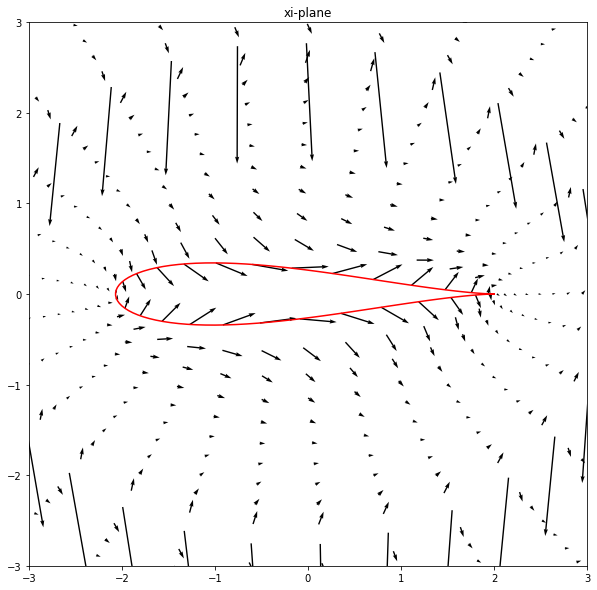

In [839]:
plt.figure(figsize=(10,10))
plt.quiver(j_grid.real[::5,::5],j_grid.imag[::5,::5],vel_xi.real[::5,::5],vel_xi.imag[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

In [840]:
print('u = ', vel_xi.real[61,0])
print('v = ', vel_xi.imag[61,0])

u =  1.04442872836
v =  -2.00632892007


In [841]:
cp = 1.0 - (u**2+v**2)/u_inf**2

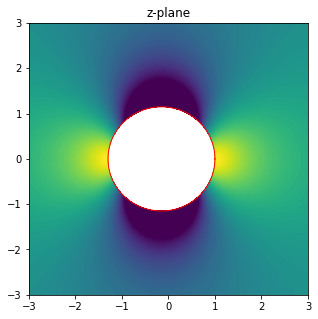

In [842]:
plt.figure(figsize=(5,5))
plt.title('z-plane')
plt.xlim(-3,3)
plt.ylim(-3,3)
contf = plt.contourf(x_grid, y_grid, cp, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)

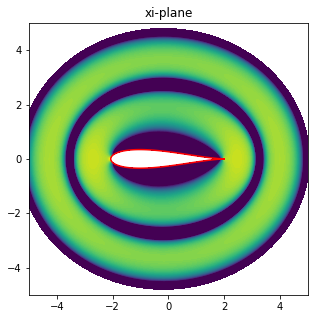

In [843]:
cp2 = 1.0 - (vel_xi.real**2+vel_xi.imag**2)/u_inf**2
plt.figure(figsize=(5,5))
plt.title('xi-plane')
plt.xlim(-5,5)
plt.ylim(-5,5)
contf = plt.contourf(j_grid.real, j_grid.imag, cp2, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')

In [844]:
cp2min = np.amin(cp2[:,0])
print(cp2min)

-22.9957992018


## Flow over symmetric airfoil, non zero AoA

In [845]:
aoa = math.radians(20)
za = (z_grid - (deltax + deltay*1j))*np.exp(-1j*aoa)

In [846]:
psi_doub = stream_doub(sigma,x_doub,y_doub,za.real,za.imag)
psi_freestream = u_inf*za.imag
psi = psi_doub + psi_freestream

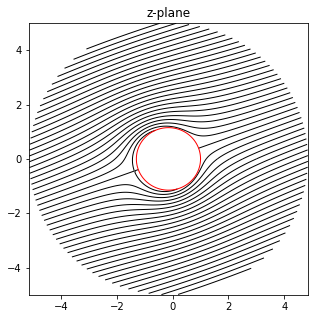

In [847]:
plt.figure(figsize=(5,5))
plt.contour(x_grid,y_grid,psi,levels=np.linspace(np.min(psi),np.max(psi),51), colors='k', linewidths=1, 
            linestyles='solid')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)
plt.title('z-plane')

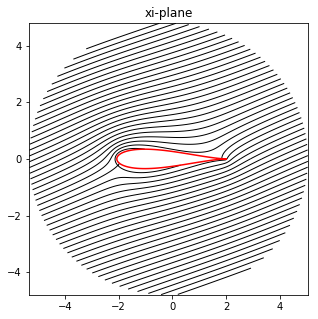

In [848]:
plt.figure(figsize=(5,5))
plt.contour(j_grid.real,j_grid.imag,psi,levels=np.linspace(np.min(psi),np.max(psi),51), colors='k', linewidths=1, 
            linestyles='solid')
z_circle = r*np.cos(theta)-(r-c) + r*np.sin(theta)*1j
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

In [849]:
u_freestream = u_inf*math.cos(aoa)*np.ones(np.shape(za.real))
v_freestream = u_inf*math.sin(aoa)*np.ones(np.shape(za.imag))
u_doub, v_doub = vel_doub(sigma,x_doub,y_doub,za.real,za.imag)
u = u_doub + u_freestream
v = v_doub + v_freestream

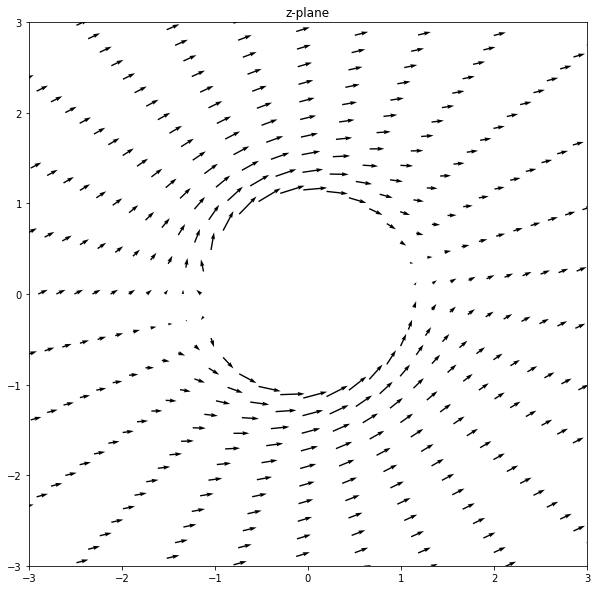

In [850]:
plt.figure(figsize=(10,10))
plt.quiver(za.real[::5,::5],za.imag[::5,::5],u[::5,::5],v[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.title('z-plane')

In [851]:
vel_xi = (u - v*1j)/(1-(c/z)**2)

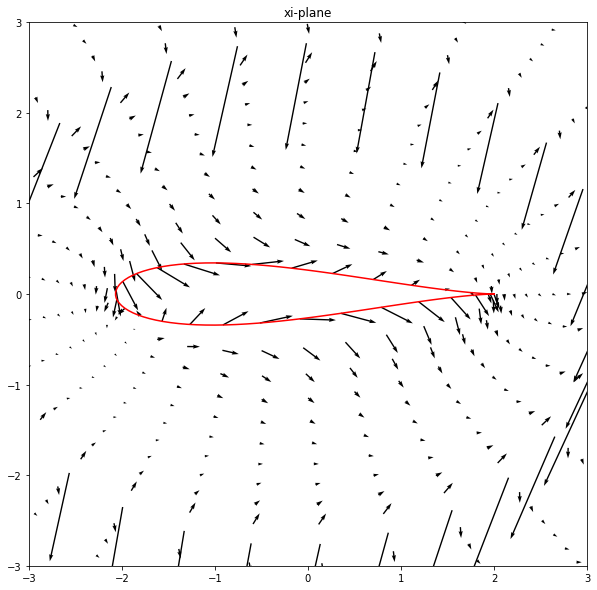

In [852]:
plt.figure(figsize=(10,10))
plt.quiver(j_grid.real[::5,::5],j_grid.imag[::5,::5],vel_xi.real[::5,::5],vel_xi.imag[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

In [853]:
cp = 1.0 - (u**2+v**2)/u_inf**2

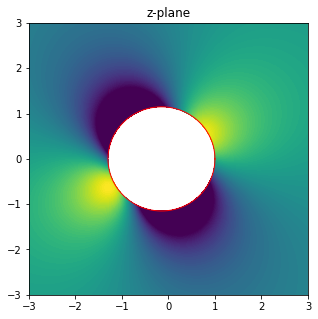

In [854]:
plt.figure(figsize=(5,5))
plt.title('z-plane')
plt.xlim(-3,3)
plt.ylim(-3,3)
contf = plt.contourf(x_grid, y_grid, cp, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)

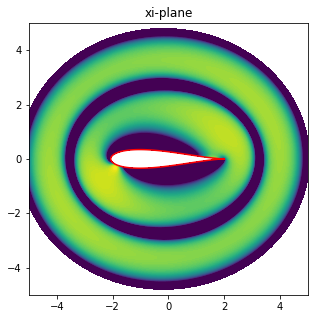

In [855]:
cp2 = 1.0 - (vel_xi.real**2+vel_xi.imag**2)/u_inf**2
plt.figure(figsize=(5,5))
plt.title('xi-plane')
plt.xlim(-5,5)
plt.ylim(-5,5)
contf = plt.contourf(j_grid.real, j_grid.imag, cp2, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')

In [856]:
stagn = np.where(np.round(u_tot**2+v_tot**2,3)==0)
print('L = ', L)
print(u[49,0],v[49,0], cp2[74,0], stagn)

L =  8.309512568745001
1.96472830656 0.52402951458 -6.12472665074 (array([], dtype=int64), array([], dtype=int64))


## Flow with non zero AoA with circulation

In [857]:
def vel_vor(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [858]:
def psi_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [859]:
sigma_vor = np.sin(aoa)* 4 *r*math.pi
print(sigma_vor)

4.9426446604


In [860]:
u_vor , v_vor = vel_vor(sigma_vor, x_doub, y_doub, za.real, za.imag)
psi_vor = psi_vortex(sigma_vor, x_doub, y_doub, za.real, za.imag)

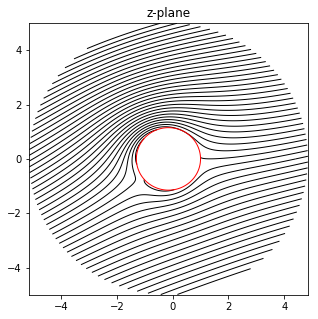

In [861]:
u_tot = u_vor + u
v_tot = v_vor + v
psi_tot = psi + psi_vor

plt.figure(figsize=(5,5))
plt.contour(x_grid,y_grid,psi_tot,levels=np.linspace(np.min(psi_tot),np.max(psi_tot),51), colors='k', linewidths=1, 
            linestyles='solid')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)
plt.title('z-plane')

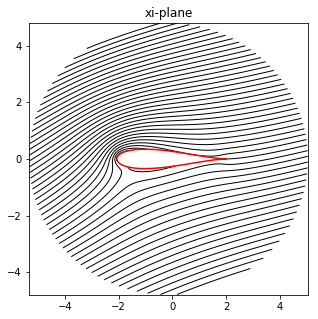

In [862]:
plt.figure(figsize=(5,5))
plt.contour(j_grid.real,j_grid.imag,psi_tot,levels=np.linspace(np.min(psi_tot),np.max(psi_tot),51), colors='k', linewidths=1, 
            linestyles='solid')
z_circle = r*np.cos(theta)-(r-c) + r*np.sin(theta)*1j
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

In [863]:
vel_xi = (u_tot - v_tot*1j)/(1-(c/z)**2)

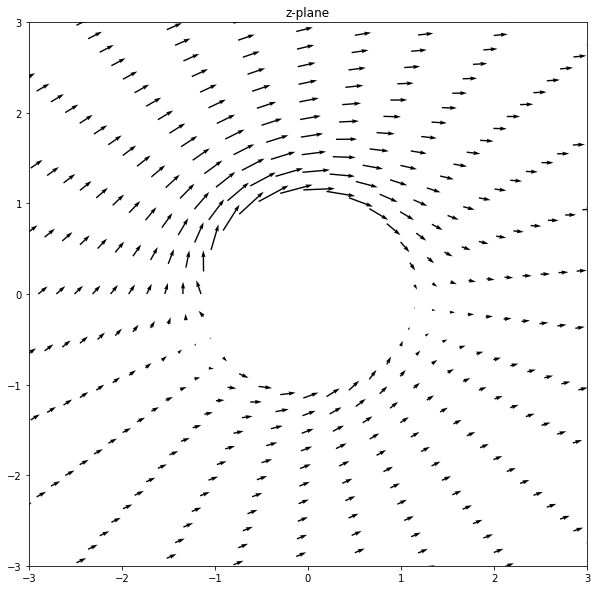

In [864]:
plt.figure(figsize=(10,10))
plt.quiver(za.real[::5,::5],za.imag[::5,::5],u_tot[::5,::5],v_tot[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.title('z-plane')

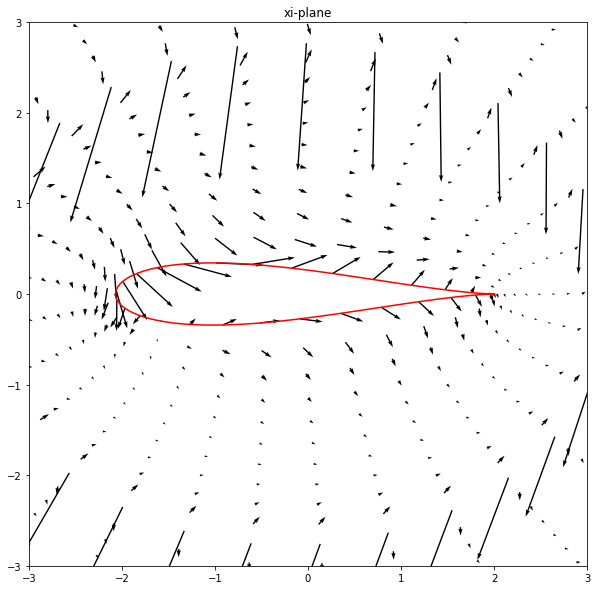

In [865]:
plt.figure(figsize=(10,10))
plt.quiver(j_grid.real[::5,::5],j_grid.imag[::5,::5],vel_xi.real[::5,::5],vel_xi.imag[::5,::5])
plt.xlim(-3,3);
plt.ylim(-3,3);
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')
plt.title('xi-plane')

In [866]:
cp = 1.0 - (u_tot**2+v_tot**2)/u_inf**2

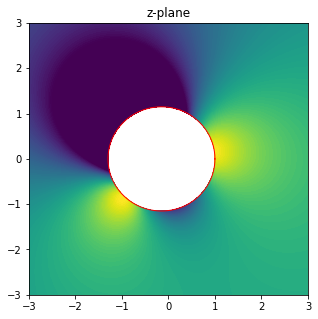

In [867]:
plt.figure(figsize=(5,5))
plt.title('z-plane')
plt.xlim(-3,3)
plt.ylim(-3,3)
contf = plt.contourf(x_grid, y_grid, cp, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(r*np.cos(theta)-(r-c),r*np.sin(theta), color ='r',linewidth = 1)

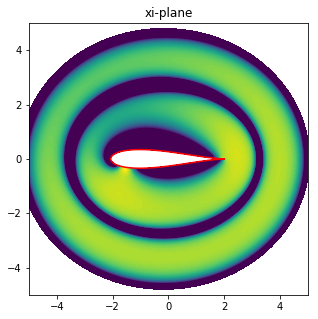

In [868]:
cp2 = 1.0 - (vel_xi.real**2+vel_xi.imag**2)/u_inf**2
plt.figure(figsize=(5,5))
plt.title('xi-plane')
plt.xlim(-5,5)
plt.ylim(-5,5)
contf = plt.contourf(j_grid.real, j_grid.imag, cp2, levels=np.linspace(-1.0, 1.0, 100), extend='both')
plt.plot(jouk(z_circle,c).real,jouk(z_circle,c).imag, color ='r')

In [869]:
rho =1.0
L = rho*sigma_vor*u_inf
stagn = np.where(np.round(u_tot**2+v_tot**2,3)==0)
print('L = ', L)

L =  4.9426446604


In [870]:
print(u_tot[91,0],v_tot[91,0], cp2[110,0], stagn)

-0.0443313137278 -0.131273526552 -8.68303897519 (array([], dtype=int64), array([], dtype=int64))
